# 爬取拉勾热门职位分析

## 任务说明

这一周，你的任务是从拉勾网上，选择自己最感兴趣的职位，获取相关数据并进行分析：

• 这个岗位的薪酬情况是怎样的？ 

• 企业对该岗位的工作经验、学历要求是怎样的？

• 目前招募该岗位的都是哪些类型的企业？（融资阶段、公司规模、行业领域）

## 代码实现

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
lagou = pd.read_csv('lagou.csv')

### 数据概览 / EDA

In [37]:
lagou.head()

,web-scraper-order,web-scraper-start-url,name,address,company,companytype,salary,job,welfare
0,1602576449-459,https://www.lagou.com/zhaopin/shujuchanpinjing...,2631MH-数据产品经理（企业大数据）,上海·浦东新…,平安租赁,金融 / 不需要融资 / 500-2000人,15k-25k\n 经...,投资/融资,"“五险一金,节日福利,定期体检,免费班车”"
1,1602576444-425,https://www.lagou.com/zhaopin/shujuchanpinjing...,数据产品经理（底层数据治理）,北京·酒仙桥,聚云数字,广告营销 / 未融资 / 50-150人,20k-40k\n 经...,广告营销,“13薪 免费午餐 周末双休”
2,1602576454-490,https://www.lagou.com/zhaopin/shujuchanpinjing...,数据产品经理,北京·亦庄,中企动力,"电商,移动互联网 / 上市公司 / 2000人以上",20k-30k\n 经...,电商,“五险一金，带薪年假，大牛带队，绩效奖金”
3,1602576457-508,https://www.lagou.com/zhaopin/shujuchanpinjing...,1231GX-大数据产品经理,上海·唐镇,平安金服,金融 / 上市公司 / 2000人以上,15k-25k\n 经...,大数据,"“五险一金,年底双薪,绩效奖金,高温补贴”"
4,1602576481-637,https://www.lagou.com/zhaopin/shujuchanpinjing...,产品经理（数据方向）,北京·望京,猿辅导,"移动互联网,教育 / D轮及以上 / 2000人以上",20k-40k\n 经...,数据,“六险一金，独角兽企业，扁平管理。”


- name： 职位名称
- address： 企业地址
- company： 企业名称
- companytype： 企业类型
- salary： 薪资
- job： 职位分类
- welfare： 企业福利

In [38]:
# 除去前两列不需要的数据
lagou = lagou.drop(['web-scraper-order','web-scraper-start-url'],axis =1)

In [171]:
# 查看各个字段中的数据情况
lagou.name.value_counts()

数据产品经理                     93
大数据产品经理                    11
高级数据产品经理                   10
产品经理（数据方向）                  4
产品经理（大数据）                   4
                           ..
数据产品经理（杭州） (MJ000537)       1
数据产品产品经理                    1
数据产品经理 (MJ001043)           1
产品经理（大数据/私有云/区块链/公有云产品）     1
1131BP-资深产品经理-云平台/数据产品      1
Name: name, Length: 136, dtype: int64

- 我们提取的是产品经理方向的职位，数据表中大部分职位都为数据产品经理

In [40]:
lagou.salary.unique()

array(['15k-25k\n                                    经验5-10年 / 本科',
       '20k-40k\n                                    经验不限 / 本科',
       '20k-30k\n                                    经验3-5年 / 本科',
       '15k-25k\n                                    经验1-3年 / 本科',
       '20k-40k\n                                    经验3-5年 / 不限',
       '20k-40k\n                                    经验不限 / 不限',
       '15k-30k\n                                    经验3-5年 / 本科',
       '17k-22k\n                                    经验3-5年 / 本科',
       '14k-20k\n                                    经验3-5年 / 本科',
       '20k-40k\n                                    经验3-5年 / 本科',
       '15k-25k\n                                    经验3-5年 / 本科',
       '25k-34k\n                                    经验5-10年 / 本科',
       '20k-35k\n                                    经验3-5年 / 本科',
       '20k-40k\n                                    经验5-10年 / 本科',
       '12k-20k\n                                    经验1-3年 / 本

- 我们发现，salary中不仅包含了工资情况，还包含了职位要求
- 通过split()函数将这两个变量分开

In [43]:
lagou['wage'] = lagou.salary.str.split('\n').str[0]
lagou['requirement'] = lagou.salary.str.split('\n').str[1]

In [121]:
# 去掉原先的salary列
lagou = lagou.drop('salary',axis = 1)

- address中包含了城市和区域两个元素，我们使用split将我们需要的城市信息拆出来

In [48]:
lagou['city'] = lagou.address.str.split('·').str[0]

In [53]:
lagou = lagou.drop('address',axis=1)

- companytype中包含了企业规模，融资阶段，行业领域三个元素，同理将其拆分

In [55]:
lagou['companysize'] = lagou.companytype.str.split('/').str[2]
lagou['companyfinance'] = lagou.companytype.str.split('/').str[1]
lagou['companyfield'] = lagou.companytype.str.split('/').str[0]

In [61]:
lagou = lagou.drop('companytype', axis = 1)

In [57]:
lagou.companysize.unique()

array([' 500-2000人', ' 50-150人', ' 2000人以上', ' 150-500人', ' 15-50人'],
      dtype=object)

- 企业规模分为15-50，50-150，150-500，500-2000以及2000以上

In [106]:
# 将companysize中的单位去除
lagou.companysize = lagou.companysize.apply(lambda x: x.strip('人'))
lagou.companysize = lagou.companysize.replace(' 2000人以上','>2000')

In [107]:
lagou.companysize.unique()

array([' 500-2000', ' 50-150', '>2000', ' 150-500', ' 15-50'],
      dtype=object)

In [58]:
lagou.companyfinance.unique()

array([' 不需要融资 ', ' 未融资 ', ' 上市公司 ', ' D轮及以上 ', ' A轮 ', ' B轮 ', ' C轮 ',
       ' 天使轮 '], dtype=object)

In [59]:
lagou.companyfield.unique()

array(['金融 ', '广告营销 ', '电商,移动互联网 ', '移动互联网,教育 ', '消费生活 ', '软件开发 ',
       '数据服务 ', '文娱丨内容 ', '社交 ', '其他 ', '金融,软件开发 ', '软件开发,数据服务 ',
       '移动互联网,消费生活 ', '电商 ', '企业服务 ', '企业服务,软件开发 ', '移动互联网 ', '房产家居 ',
       '移动互联网,电商 ', '汽车丨出行 ', '企业服务,物联网 ', '移动互联网,文娱丨内容 ', '游戏 ',
       '企业服务、教育 ', '移动互联网,医疗丨健康 ', '数据服务,广告营销 ', '移动互联网,金融 ', '移动互联网,社交 ',
       '电商,文娱丨内容 ', '移动互联网,企业服务 ', '电商,消费生活 ', '旅游 ', '移动互联网,房产家居 ',
       '教育 ', '工具 ', '社交,文娱丨内容 ', '电商,软件开发 ', '企业服务,消费生活 ', '电商,金融 ',
       '不限 ', '人工智能 ', '硬件,人工智能 ', '数据服务,软件开发 ', '金融,电商 ', '数据服务,人工智能 ',
       '数据服务,企业服务 ', '移动互联网,数据服务 ', '企业服务,广告营销 ', '企业服务,数据服务 ', '硬件 ',
       '数据服务,信息安全 ', '电商,数据服务 ', '文娱丨内容,硬件 ', '教育,移动互联网 ', '金融,消费生活 ',
       '数据服务,硬件 ', '医疗丨健康,移动互联网 ', '移动互联网,物联网 ', '电商,房产家居 ',
       '数据服务,移动互联网 ', '金融,教育 ', '移动互联网,其他 ', '物联网 ', '游戏,移动互联网 ',
       '移动互联网,游戏 '], dtype=object)

In [62]:
lagou.welfare.unique()

array(['“五险一金,节日福利,定期体检,免费班车”', '“13薪 免费午餐 周末双休”',
       '“五险一金，带薪年假，大牛带队，绩效奖金”', '“五险一金,年底双薪,绩效奖金,高温补贴”',
       '“六险一金，独角兽企业，扁平管理。”', '“发展前景”', '“发展空间大，产品驱动型公司”',
       '“五险一金,带薪年假,节日福利,周末双休”', '“扁平管理、三餐免费六险一金”',
       '“大平台,好学习发展,特色文化,全面福利”', '“五险一金,绩效奖金,带薪年假,定期体检”', '“福利多多”',
       '“弹性工作制，工作地点近地铁”', '“金融科技数据产品设计是数字化时代的风口”', '“弹性上下班、餐补、通讯补贴”',
       '“上市公司 福利待遇好 发展前景好”', '“团队氛围好、平台巨大、空间无限”',
       '“13~17薪 年轻团队 大平台 发展好 技术成长”', '“大牛团队 办公环境好”',
       '“团队年轻 领导nice 世界500强”', '“互联网广告行业龙头”', '“六险一金；节假日福利；旅游基金；各种团建”',
       '“上市公司”', '“腾讯系 中台系统 数据中台”', '“六险一金 绩效奖金 年度调薪 年度晋升”', '“大平台”',
       '“五险一金，双休，”', '“六险一金，弹性工作，免费三餐，餐补”', '“六险一金,股票期权,弹性工作,免费三餐”',
       '“发展空间大、带薪年假、扁平管理等”', '“奖金多,股票期权,团队好,领导好”', '“弹性工作”',
       '“全勤奖、餐补、双薪、五险一金”', '“平台发展 周末双休 年终奖金”', '“弹性工作精英团队大数据平台,福利待遇好”',
       '“六险一金、弹性工作、年度体检、成长空间大”', '“包三餐、免费班车、交补餐补话补、节日福利”',
       '“福利待遇好 发展空间大”', '“平台稳定；福利多多；氛围轻松；爱心假日”', '“技术open，领导nice，氛围轻松”',
       '“六险一金，弹性工作，免费三餐，扁平管理”', '“数据可视化,大数据应用”', '“成熟团队,上升空间”',
   

In [66]:
lagou.wage.unique()

array(['15k-25k', '20k-40k', '20k-30k', '15k-30k', '17k-22k', '14k-20k',
       '25k-34k', '20k-35k', '12k-20k', '18k-35k', '35k-50k', '25k-50k',
       '25k-40k', '18k-30k', '10k-18k', '12k-22k', '11k-18k', '30k-45k',
       '10k-15k', '20k-25k', '18k-28k', '30k-50k', '35k-40k', '8k-15k',
       '25k-35k', '9k-15k', '22k-35k', '7k-14k', '30k-55k', '13k-25k',
       '10k-20k', '4k-6k', '6k-12k', '8k-14k', '8k-16k', '18k-36k',
       '15k-20k', '14k-28k', '16k-32k', '2k-3k', '25k-30k', '16k-30k',
       '25k-45k', '15k-22k', '18k-25k', '8k-10k', '40k-60k', '11k-22k',
       '11k-20k', '30k-40k', '12k-18k', '12k-16k', '13k-20k', '46k-60k'],
      dtype=object)

- wage中薪资包含最高和最低薪资两个元素，我们对其进行拆分

In [67]:
lagou['wage_low'] = lagou.wage.str.split('-').str[0]
lagou['wage_high'] = lagou.wage.str.split('-').str[1]

In [74]:
# 将后面的单位符号去除
lagou.wage_low = lagou.wage_low.apply(lambda x: x.strip('k'))
lagou.wage_high = lagou.wage_high.apply(lambda x: x.strip('k'))

In [81]:
# 去除原先的列
lagou = lagou.drop('wage',axis = 1)

In [76]:
# 将薪资转化为数值变量
lagou.wage_low = lagou.wage_low.astype(int)
lagou.wage_high = lagou.wage_high.astype(int)

In [89]:
# 计算平均薪资
lagou['wage_avg'] = (lagou.wage_high + lagou.wage_low)/2

接着我们将requirement中的经验和学历拆分开

In [153]:
lagou['education'] = lagou.requirement.str.split('/').str[1]
lagou['experiment'] = lagou.requirement.str.split('/').str[0]

In [303]:
# 删除原有列
lagou = lagou.drop('requirement',axis = 1)

In [309]:
# 删除字段中多余的空格
lagou.education = lagou.education.str.strip()
lagou.experiment = lagou.experiment.str.strip()

In [307]:
lagou.education.value_counts(1)

本科    0.925532
不限    0.035461
大专    0.014184
应届    0.014184
硕士    0.010638
Name: education, dtype: float64

- 我们可以发现大部分学历要求为本科生

In [310]:
lagou.experiment.value_counts(1)

经验3-5年     0.546099
经验5-10年    0.248227
经验1-3年     0.131206
经验不限       0.056738
经验在校       0.014184
经验10年以上    0.003546
Name: experiment, dtype: float64

- 我们发现超过半数要求求职者有3-5年的相关经验

In [311]:
lagou.head()

,name,company,job,welfare,city,companysize,companyfinance,companyfield,wage_low,wage_high,wage_avg,education,experiment
0,2631MH-数据产品经理（企业大数据）,平安租赁,投资/融资,"“五险一金,节日福利,定期体检,免费班车”",上海,500-2000,不需要融资,金融,15,25,20.0,本科,经验5-10年
1,数据产品经理（底层数据治理）,聚云数字,广告营销,“13薪 免费午餐 周末双休”,北京,50-150,未融资,广告营销,20,40,30.0,本科,经验不限
2,数据产品经理,中企动力,电商,“五险一金，带薪年假，大牛带队，绩效奖金”,北京,>2000,上市公司,"电商,移动互联网",20,30,25.0,本科,经验3-5年
3,1231GX-大数据产品经理,平安金服,大数据,"“五险一金,年底双薪,绩效奖金,高温补贴”",上海,>2000,上市公司,金融,15,25,20.0,本科,经验1-3年
4,产品经理（数据方向）,猿辅导,数据,“六险一金，独角兽企业，扁平管理。”,北京,>2000,D轮及以上,"移动互联网,教育",20,40,30.0,不限,经验3-5年


In [159]:
lagou.shape

(285, 14)

In [160]:
lagou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            285 non-null    object 
 1   company         285 non-null    object 
 2   job             285 non-null    object 
 3   welfare         285 non-null    object 
 4   requirement     285 non-null    object 
 5   city            285 non-null    object 
 6   companysize     285 non-null    object 
 7   companyfinance  285 non-null    object 
 8   companyfield    285 non-null    object 
 9   wage_low        285 non-null    int64  
 10  wage_high       285 non-null    int64  
 11  wage_avg        285 non-null    float64
 12  education       285 non-null    object 
 13  experiment      285 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 31.3+ KB


- 数据中不含有缺失值

先查看职位的城市分布

In [129]:
lagou.city.value_counts()

北京    128
深圳     46
上海     34
广州     30
杭州     21
成都     11
武汉      4
佛山      3
重庆      2
长沙      2
苏州      1
贵阳      1
厦门      1
合肥      1
Name: city, dtype: int64

- 我们发现大部分的职位地点都在北京（原因可能是爬取的是互联网工作数据，北京有大部分的互联网公司）

<AxesSubplot:xlabel='wage_avg', ylabel='city'>

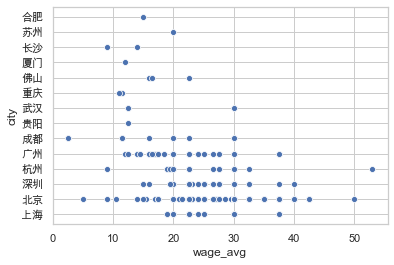

In [134]:
# 查看各个城市的薪资分布
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.scatterplot(x = 'wage_avg', y = 'city', data = lagou)

In [133]:
# 比较各个城市的薪资情况
lagou.groupby('city')['wage_avg'].describe().sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
北京,128.0,28.300781,7.485771,5.0,22.500,30.00,32.500,50.0
上海,34.0,25.573529,5.485701,19.0,22.500,22.50,30.000,37.5
深圳,46.0,25.554348,5.196396,15.0,22.500,25.00,30.000,40.0
杭州,21.0,24.785714,8.547765,9.0,20.000,22.50,30.000,53.0
广州,30.0,21.866667,6.700403,12.0,17.000,20.00,26.125,37.5
武汉,4.0,21.250000,10.103630,12.5,12.500,21.25,30.000,30.0
苏州,1.0,20.000000,NaN,20.0,20.000,20.00,20.000,20.0
佛山,3.0,18.333333,3.617089,16.0,16.250,16.50,19.500,22.5
成都,11.0,16.181818,9.440002,2.5,11.500,16.00,21.250,30.0


- 我们发现，北京的平均工资最高，约为28.3k，上海和深圳的平均工资相似约为25.6k，杭州的薪资约为24.8k，广州的薪资约为21.9k（其余城市因为样本量过小不予考虑）
- 同时，北京和杭州的岗位平均薪资标准差略大于上海和深圳，说明基于不同工作，平均薪资的浮动会略大一些

In [146]:
# 查看企业领域的分布
lagou.companyfield.value_counts(1)

文娱丨内容           0.115789
金融              0.091228
移动互联网           0.056140
电商              0.052632
数据服务            0.042105
                  ...   
医疗丨健康,移动互联网     0.003509
数据服务,人工智能       0.003509
移动互联网,医疗丨健康     0.003509
金融,电商           0.003509
电商,房产家居         0.003509
Name: companyfield, Length: 65, dtype: float64

<AxesSubplot:>

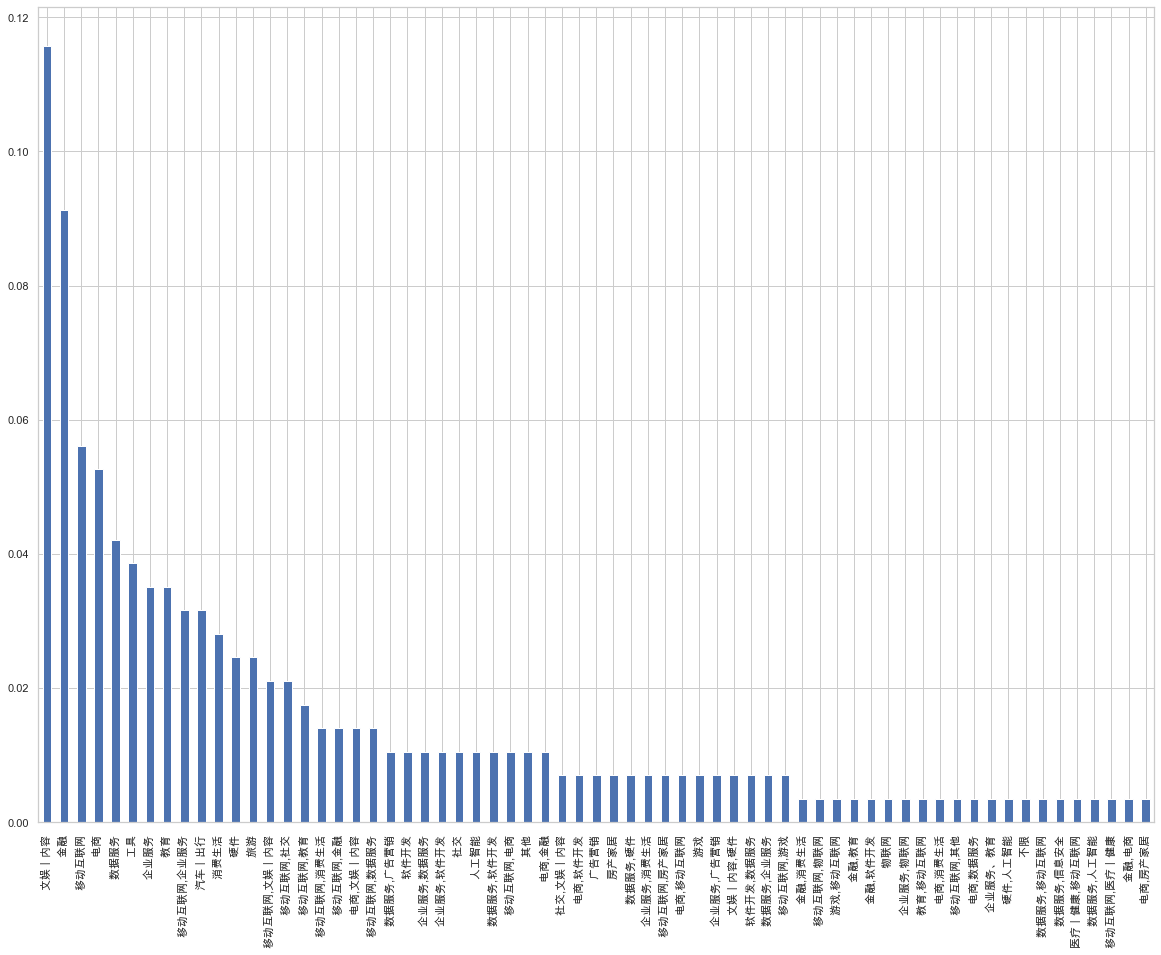

In [150]:
# 企业领域分布直方图
plt.figure(figsize=(20, 15))
lagou.companyfield.value_counts(1).plot(kind = 'bar')

- 我们可以看出文娱｜内容领域的企业较多，其次则是金融领域，接着是互联网和电商领域

<AxesSubplot:xlabel='wage_avg', ylabel='companyfield'>

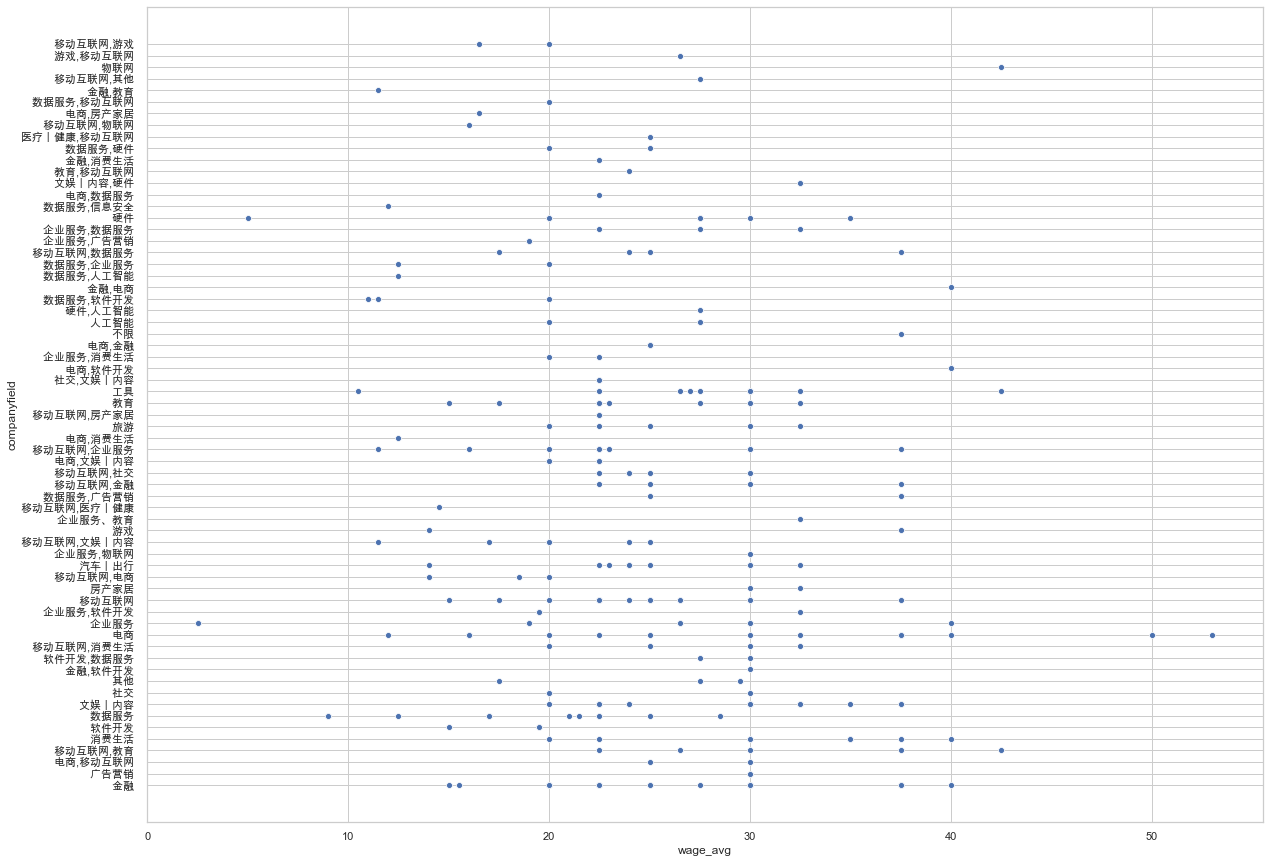

In [142]:
# 查看企业领域和薪资之间的关系
plt.figure(figsize=(20, 15))
sns.scatterplot( y = 'companyfield',x = 'wage_avg', data = lagou)

In [229]:
lagou.groupby('companyfield')['wage_avg'].describe().sort_values(['count','mean'], ascending = False).head(20)

,count,mean,std,min,25%,50%,75%,max
companyfield,,,,,,,,
文娱丨内容,33.0,29.257576,4.089088,20.0,30.000,30.00,30.000,37.5
金融,26.0,26.557692,7.182377,15.0,20.625,25.00,30.000,40.0
移动互联网,16.0,24.343750,5.274842,15.0,22.500,23.25,26.500,37.5
电商,15.0,29.700000,12.805970,12.0,18.000,30.00,37.500,53.0
数据服务,12.0,17.875000,6.715400,9.0,11.625,19.00,22.500,28.5
工具,11.0,28.090909,7.657735,10.5,26.750,30.00,30.000,42.5
教育,10.0,24.300000,5.643088,15.0,22.500,22.75,29.375,32.5
企业服务,10.0,22.600000,12.162785,2.5,19.000,26.50,30.000,40.0
汽车丨出行,9.0,25.000000,5.471517,14.0,23.000,24.00,30.000,32.5


- 通过分类查看之后，我们发现文娱｜内容领域和电商领域的平均薪资较高，但是电商领域的平均薪资标准差高于相比较的其他领域许多，并不能保证其平均薪资的稳定性（电商的最高薪资为53k，而最低薪资为12k）
- 除此之外，在样本数量大于十的样本中金融，移动互联网，工具，教育，企业服务领域的平均薪资都大于20k（企业服务领域中最低薪资仅为2.5k，这导致了其标准差增大）

In [250]:
# 查看’企业服务‘领域的职位信息
lagou[lagou['companyfield'] == '企业服务 ']

,name,company,job,welfare,requirement,city,companysize,companyfinance,companyfield,wage_low,wage_high,wage_avg,education,experiment
19,数据产品经理,数位科技,大数据,“大牛团队 办公环境好”,经验5-10年 / 本科,深圳,150-500,B轮,企业服务,18,35,26.5,本科,经验5-10年
49,产品经理（大数据/私有云/区块链/公有云产品）,UCloud,云计算,“福利完善、弹性工作制”,经验3-5年 / 本科,上海,500-2000,D轮及以上,企业服务,20,40,30.0,本科,经验3-5年
101,数据产品产品经理,用友,ERP,"“五险一金,餐补,班车,团队氛围好”",经验5-10年 / 本科,北京,>2000,上市公司,企业服务,30,50,40.0,本科,经验5-10年
117,产品经理（数据治理）,诺诺网络科技,企业服务,“央企背景，财税大蓝海”,经验3-5年 / 本科,杭州,500-2000,未融资,企业服务,13,25,19.0,本科,经验3-5年
120,数据产品经理,数位科技,大数据,“大牛团队 办公环境好”,经验5-10年 / 本科,深圳,150-500,B轮,企业服务,18,35,26.5,本科,经验5-10年
142,数据高级产品经理,数位科技,大数据,“高福利待遇，周围都是大牛”,经验5-10年 / 本科,深圳,150-500,B轮,企业服务,25,35,30.0,本科,经验5-10年
163,产品经理（数据治理）,诺诺网络科技,企业服务,“央企背景，财税大蓝海”,经验3-5年 / 本科,杭州,500-2000,未融资,企业服务,13,25,19.0,本科,经验3-5年
230,产品经理-大数据方向,有赞,电商,“上市公司 五险一金 氛围好 发展空间”,经验不限 / 不限,杭州,>2000,上市公司,企业服务,20,40,30.0,不限,经验不限


- 我们查看了企业领域为‘企业服务’的工作，发现平均薪资为2.5k的为实习工作，我们决定将实习的职位去掉不考虑

In [244]:
# 去掉含有‘实习’字符的岗位
lagou = lagou[~ lagou['name'].str.contains('实习') ]

In [247]:
# 重新观察不同领域薪资情况
lagou.groupby('companyfield')['wage_avg'].describe().sort_values(['count','mean'], ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
companyfield,,,,,,,,
文娱丨内容,33.0,29.257576,4.089088,20.0,30.000,30.00,30.000,37.5
金融,26.0,26.557692,7.182377,15.0,20.625,25.00,30.000,40.0
移动互联网,16.0,24.343750,5.274842,15.0,22.500,23.25,26.500,37.5
电商,15.0,29.700000,12.805970,12.0,18.000,30.00,37.500,53.0
数据服务,12.0,17.875000,6.715400,9.0,11.625,19.00,22.500,28.5
工具,11.0,28.090909,7.657735,10.5,26.750,30.00,30.000,42.5
教育,10.0,24.300000,5.643088,15.0,22.500,22.75,29.375,32.5
汽车丨出行,9.0,25.000000,5.471517,14.0,23.000,24.00,30.000,32.5
"移动互联网,企业服务",9.0,23.666667,7.866066,11.5,20.000,22.50,30.000,37.5


<AxesSubplot:xlabel='wage_avg', ylabel='companysize'>

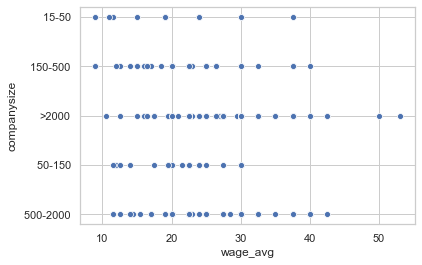

In [398]:
# 查看企业大小和薪资之间的关系
sns.scatterplot( y = 'companysize', x = 'wage_avg',  data = lagou)

In [403]:
lagou.groupby('companysize')['wage_avg'].describe().sort_values('mean', ascending = False)

,count,mean,std,min,25%,50%,75%,max
companysize,,,,,,,,
>2000,134.0,27.925373,7.073329,10.5,22.500,30.0,30.00,53.0
500-2000,70.0,25.385714,7.159250,11.5,20.000,25.0,30.00,42.5
150-500,44.0,22.715909,7.325011,9.0,18.125,22.5,26.50,40.0
50-150,23.0,22.108696,5.929427,11.5,19.500,22.5,26.25,30.0
15-50,11.0,20.909091,9.112678,9.0,13.250,19.0,27.00,37.5


- 我们发现大的企业拥有更高的平均薪资和薪资上限

<AxesSubplot:xlabel='wage_avg', ylabel='companyfinance'>

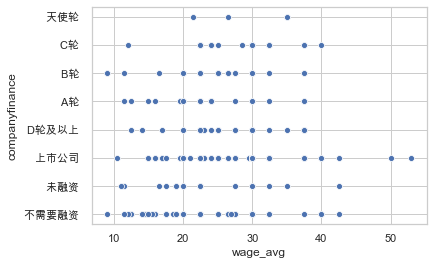

In [248]:
# 查看企业金融情况和薪资之间的关系
sns.scatterplot( x = 'wage_avg', y = 'companyfinance', data = lagou)

- 我们可以看出，上市公司的平均薪资拥有更高的上限

<AxesSubplot:xlabel='wage_avg', ylabel='experiment'>

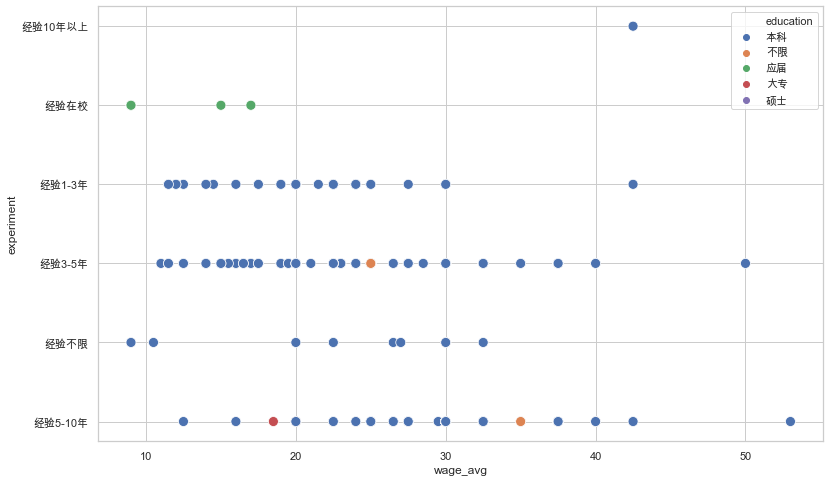

In [312]:
# 查看平均薪资和学历/经验的关系
plt.figure(figsize = (13,8))
sns.scatterplot(x = 'wage_avg', y = 'experiment', hue = 'education', s = 100, data = lagou)

从图中我们可以看出
- 经验在校的应届生普遍平均薪资较低（都低于20k）
- 学历为大专的求职者 即便有较多的经验一依然只能获得较低的薪资
- 经验的长短对平均薪资的下限影响不大（基本都为10k左右），但是经验越长，平均薪资的上限越高（经验10年以上的样本量过小不予考虑）：经验1-3年的最高平均薪资约为43k，经验3-5年的最高平均薪资约为50k，经验5-10年的最高平均薪资则高于50k

In [290]:
lagou.groupby('job')['wage_avg'].describe().sort_values(['count','mean'], ascending = False).head(15)
# 提取数量前15的职位类型
top15 = lagou.groupby('job')['wage_avg'].describe().sort_values(['count','mean'], ascending = False).head(15).index

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
大数据,50.0,23.350000,8.197965,9.0,20.000,22.5,29.625,42.5
数据分析,35.0,26.314286,7.188722,12.0,22.500,25.0,30.000,42.5
电商,33.0,27.484848,8.334309,16.0,22.500,25.0,30.000,50.0
数据,17.0,26.764706,5.503174,17.5,22.500,27.5,30.000,40.0
产品经理,15.0,29.366667,4.607706,22.5,27.000,30.0,30.000,37.5
产品设计,15.0,22.866667,7.595738,11.5,17.000,22.5,28.750,37.5
金融,10.0,22.900000,7.260242,9.0,20.000,22.5,30.000,30.0
广告营销,9.0,26.333333,7.737894,19.0,19.500,25.0,30.000,37.5
产品策划,9.0,26.166667,11.908505,11.0,19.500,22.5,30.000,53.0


<AxesSubplot:xlabel='wage_avg', ylabel='job'>

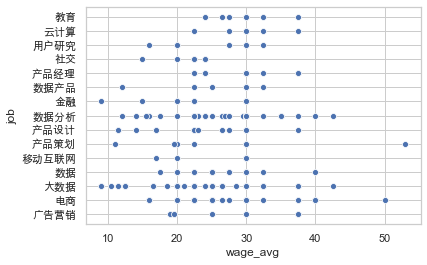

In [300]:
# 绘制平均薪资和职位类型的散点图（only top15 job）
sns.scatterplot( x = 'wage_avg', y = 'job', data = lagou[lagou.job.isin(top15)])

## 结论

我主要收集的是各个公司产品经理这个岗位的信息，从扒取的数据中我得到以下几点结论：
- 首先他们的主要工作领域包含大数据、数据分析、电商、产品设计、产品策划、广告营销、金融等，这些都是要成为一个产品经理可能需要具备的条件
- 第二，不同公司所属的领域也有区别，其中文娱、电商、教育、数据等都是这些公司主要的业务领域
- 第三，北上广深杭拥有巨大的工作机会，特别是北京，超过半数的岗位都在北京，且北京相较于其他城市有更高的平均薪资
- 第四，规模越大的企业含有更高的平均薪资和更高的薪资上限，同样，上市公司也拥有更高的平均薪资，所以还是比较推荐到大厂去
- 第五，在同等学历下，更多的经验意味着更高的平均薪资，但是如果学历较低，即使有丰富的经验也很难弥补学历的gap

这份数据中，我主要已平均薪资作为一个量化标注来衡量一个岗位，在现实中，我们同样还要关注其他方面，比如：公司制度，公司福利，公司理念和发展方向等，很多方面都不能简单的靠数据进行定量分析，而是需要配合现实的定性分析同步进行

希望大家都可以找到喜欢的工作